In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(["ls", "../../resources/prices"]).decode("utf8"))

coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_USDCoin.csv
coin_Uniswap.csv
coin_WrappedBitcoin.csv
coin_XRP.csv



## Load and inspect data

In [3]:
usdt_df = pd.read_csv(Path('../../resources/prices/coin_Tether.csv'), index_col='SNo')
usdt_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Tether,USDT,2015-02-26 23:59:59,1.212320,1.194710,1.210420,1.205740,5.955460e+00,3.033642e+05
2,Tether,USDT,2015-03-02 23:59:59,0.607890,0.568314,0.571249,0.606502,3.032500e+00,1.525959e+05
3,Tether,USDT,2015-03-03 23:59:59,0.606229,0.604416,0.605129,0.606229,3.031130e+00,1.525272e+05
4,Tether,USDT,2015-03-06 23:59:59,1.000000,1.000000,1.000000,1.000000,9.264720e+01,2.516000e+05
5,Tether,USDT,2015-03-07 23:59:59,1.000000,1.000000,1.000000,1.000000,5.819680e+04,2.516000e+05
...,...,...,...,...,...,...,...,...,...
2185,Tether,USDT,2021-02-23 23:59:59,1.000542,0.997413,1.000168,1.000032,1.959649e+11,3.476222e+10
2186,Tether,USDT,2021-02-24 23:59:59,1.000882,0.999538,0.999995,1.000757,1.290074e+11,3.491021e+10
2187,Tether,USDT,2021-02-25 23:59:59,1.001207,0.999795,1.000746,1.000149,1.054643e+11,3.492798e+10


In [4]:
usdt_df['Date'] = pd.to_datetime(usdt_df['Date']).dt.date
usdt_df['Date'] = pd.to_datetime(usdt_df['Date'])
usdt_df['Spread'] = usdt_df.High - usdt_df.Low
usdt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 1 to 2189
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       2189 non-null   object        
 1   Symbol     2189 non-null   object        
 2   Date       2189 non-null   datetime64[ns]
 3   High       2189 non-null   float64       
 4   Low        2189 non-null   float64       
 5   Open       2189 non-null   float64       
 6   Close      2189 non-null   float64       
 7   Volume     2189 non-null   float64       
 8   Marketcap  2189 non-null   float64       
 9   Spread     2189 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 188.1+ KB


## Plot the closing value of XMR over time

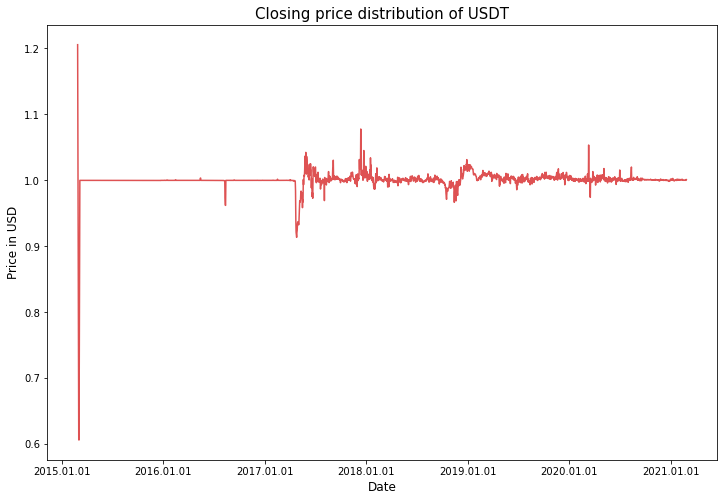

In [5]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = usdt_df.Close.values, x=usdt_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = usdt_df.Close.values, x=usdt_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of USDT", fontsize=15)
plt.show()

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

usdt_df['Date_mpl'] = usdt_df['Date'].apply(lambda x: mdates.date2num(x))

temp_usdt_df = usdt_df.copy(deep=False)
temp_usdt_df = temp_usdt_df.set_index(['Date'])
temp_usdt_df = temp_usdt_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_usdt_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2015-02-26,1.212320,1.194710,1.210420,1.205740,5.955460e+00,16492.0
2015-03-02,0.607890,0.568314,0.571249,0.606502,3.032500e+00,16496.0
2015-03-03,0.606229,0.604416,0.605129,0.606229,3.031130e+00,16497.0
2015-03-06,1.000000,1.000000,1.000000,1.000000,9.264720e+01,16500.0
2015-03-07,1.000000,1.000000,1.000000,1.000000,5.819680e+04,16501.0
...,...,...,...,...,...,...
2021-02-23,1.000542,0.997413,1.000168,1.000032,1.959649e+11,18681.0
2021-02-24,1.000882,0.999538,0.999995,1.000757,1.290074e+11,18682.0
2021-02-25,1.001207,0.999795,1.000746,1.000149,1.054643e+11,18683.0


/Users/arttucker/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


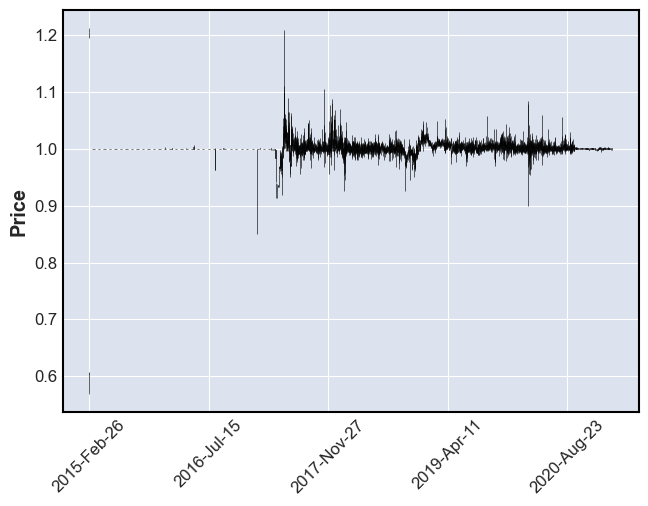

In [7]:
mpf.plot(temp_usdt_df, type='candle')

## Price prediction

In [8]:
from fbprophet import Prophet

In [9]:
INPUT_FILE = "coin_Tether.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]

m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2214,2021-03-25 23:59:59,1.004292,0.986048,1.023163
2215,2021-03-26 23:59:59,1.003996,0.985912,1.020523
2216,2021-03-27 23:59:59,1.004248,0.985276,1.023147
2217,2021-03-28 23:59:59,1.004228,0.985997,1.023084
2218,2021-03-29 23:59:59,1.002715,0.983510,1.021166


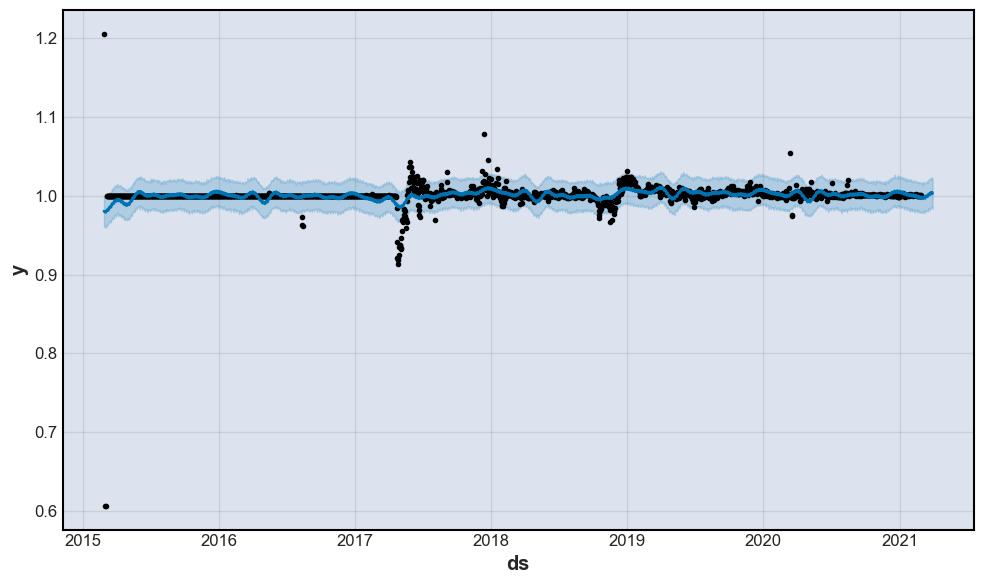

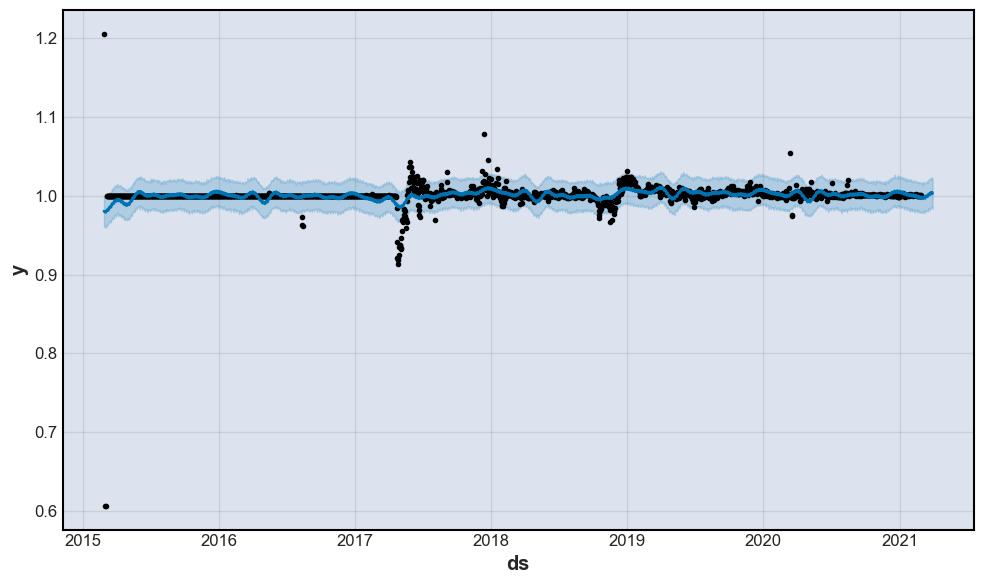

In [10]:
m.plot(forecast)

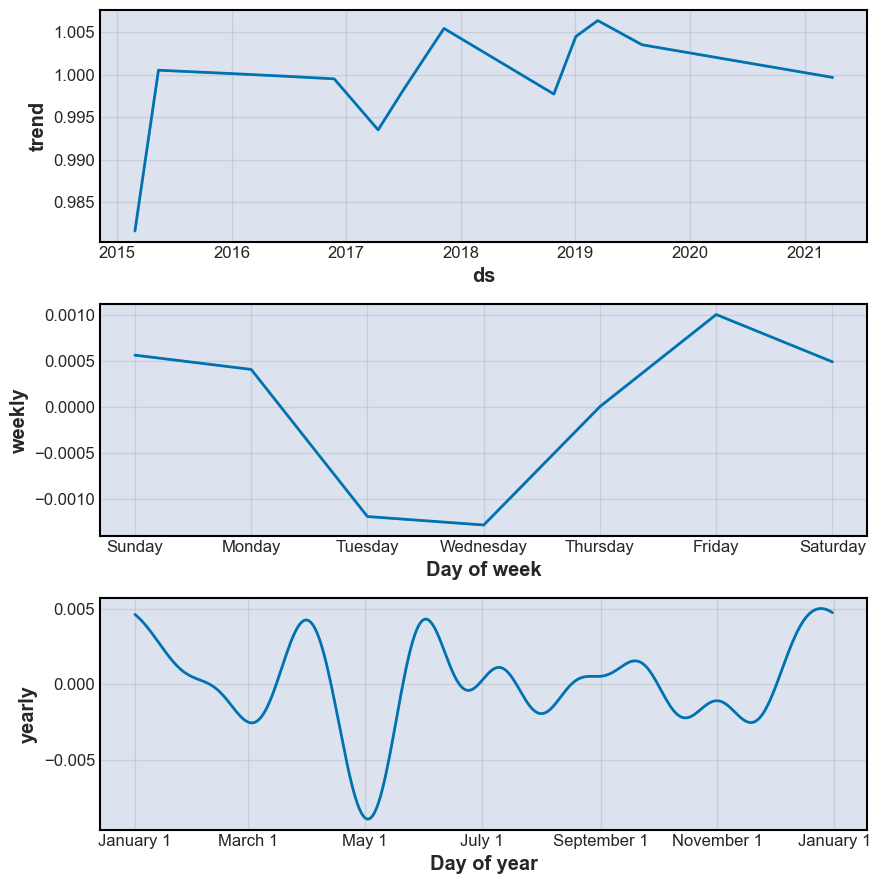

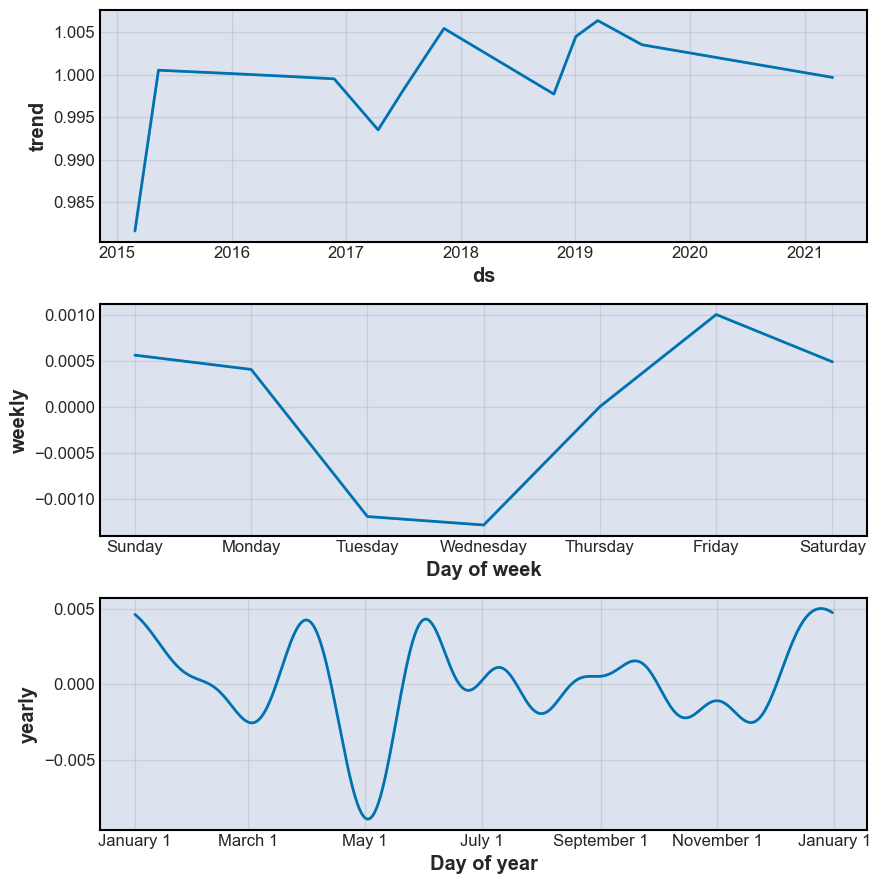

In [11]:
m.plot_components(forecast)